In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import os
import datetime

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
# set seed for reproducibility
np.random.seed(42) 
IMAGES_PATH=os.path.join(os.getcwd(),"static/")
if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)   

In [5]:
# read in all our data
earthquakes = pd.read_csv(os.path.join(os.getcwd(),"Data/Day3/database.csv"))
landslides = pd.read_csv(os.path.join(os.getcwd(),"Data/Day3/catalog.csv"))
volcanos = pd.read_csv(os.path.join(os.getcwd(),"Data/Day3/volcanic_database.csv"))

In [6]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [7]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [13]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [14]:
# print the first few rows
display(landslides['date_parsed'].head())

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [18]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date_parsed'].dt.day
print day_of_month_landslides[:10]

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
5    20.0
6    24.0
7    21.0
8    27.0
9    27.0
Name: date_parsed, dtype: float64


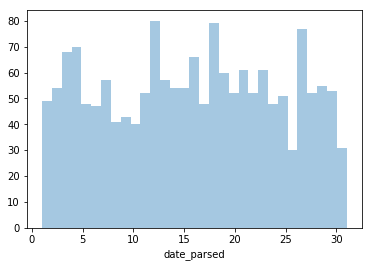

In [19]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)